# Science 2 — Assignment 
## Roll Number: 2024101017

---

### Parameters Derived from Roll Number

| Question | Formula | Value |
|:--------:|:--------|:------|
| **Q1** | Option = Roll No % 5 + 1 = **3** | (a) $e^x$ in $[-3,\, 3]$, (b) $e^x \sin x$ in $[-1,\, 1]$ |
| **Q2** | $N$ = Roll No % 5 + 5 = **7** | Graph with **7 nodes** and **10 links** |
| **Q3** | $a = -($ Roll No % 5 + 1 $) = -3$ | $a = -3$ |
|          | $b = 2 \times ($ Roll No % 10 $) = 14$ | $b = 14$ |
| **Q4** | $k = ($ Roll No % 4 $) + 1 = 2$ | $k = 2,\; m = 1$ |

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import networkx as nx1

np.random.seed(42)  # Set seed for reproducibility

---
# Q1: Monte Carlo Integration 

**Option 3 (Roll Number % 5 + 1 = 3):**
- **(a)** $\int_{-3}^{3} e^x \, dx$ — Exact answer: $e^3 - e^{-3} \approx 20.0357$
- **(b)** $\int_{-1}^{1} e^x \sin x \, dx$ — Exact answer (by parts): $\frac{1}{2}[e^x(\sin x - \cos x)]_{-1}^{1}$

Plot integration value as a function of N (number of samples) for $N = 10, 10^2, 10^3, 10^4$.

## Q1(a): $\int_{-3}^{3} e^x \, dx$

**Method:** We use Monte Carlo integration — generate $N$ uniform random samples $x_i \in [a, b]$ and estimate:
$$\int_a^b f(x)\,dx \approx (b - a) \cdot \frac{1}{N} \sum_{i=1}^{N} f(x_i)$$

**Exact answer:** $\int_{-3}^{3} e^x \, dx = e^3 - e^{-3} \approx 20.0357$

We test with $N = 10,\, 10^2,\, 10^3,\, 10^4$ to observe convergence.

N =    10: MC estimate = 21.532279, Exact = 20.035750, Error = 1.496529
N =   100: MC estimate = 17.479646, Exact = 20.035750, Error = 2.556104
N =  1000: MC estimate = 20.622374, Exact = 20.035750, Error = 0.586624
N = 10000: MC estimate = 19.469369, Exact = 20.035750, Error = 0.566380


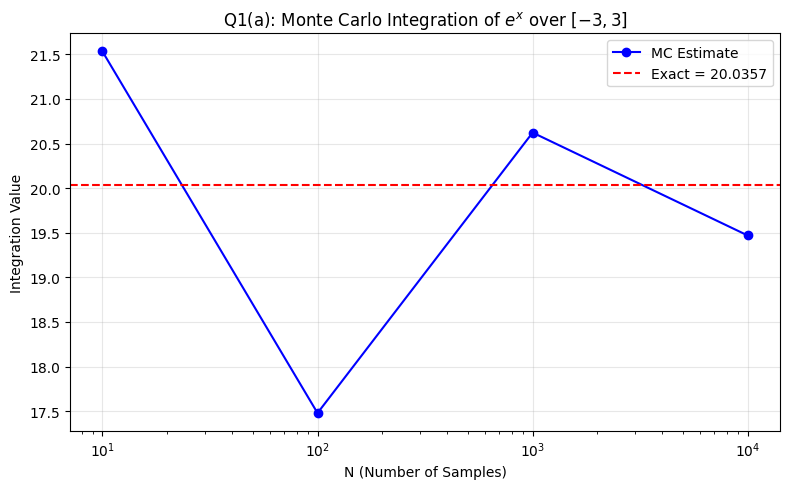


Exact value of integral: 20.035750


In [4]:
# Define the Monte Carlo integration function
def monte_carlo_integrate(f, a, b, N):
    """Monte Carlo integration of f over [a, b] using N random samples."""
    x = np.random.uniform(a, b, N)       # Generate N uniform random samples in [a, b]
    return (b - a) * np.mean(f(x))        # Estimate: (b-a) * average of f(x_i)

# Define function and integration limits for Q1(a)
f_a = lambda x: np.exp(x)                # f(x) = e^x
a_q1a, b_q1a = -3, 3                     # Integration range [-3, 3]
exact_a = np.exp(3) - np.exp(-3)         # Exact: ∫e^x dx = e^3 - e^{-3}

# Run MC integration for different sample sizes
N_values = [10, 100, 1000, 10000]
mc_results_a = []

for N in N_values:
    result = monte_carlo_integrate(f_a, a_q1a, b_q1a, N)
    mc_results_a.append(result)
    print(f"N = {N:>5d}: MC estimate = {result:.6f}, Exact = {exact_a:.6f}, Error = {abs(result - exact_a):.6f}")

# Plot: MC estimate vs exact value for increasing N
plt.figure(figsize=(8, 5))
plt.plot(N_values, mc_results_a, 'bo-', label='MC Estimate')
plt.axhline(y=exact_a, color='r', linestyle='--', label=f'Exact = {exact_a:.4f}')
plt.xscale('log')
plt.xlabel('N (Number of Samples)')
plt.ylabel('Integration Value')
plt.title(r'Q1(a): Monte Carlo Integration of $e^x$ over $[-3, 3]$')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nExact value of integral: {exact_a:.6f}")

**Analysis — Q1(a):**

The Monte Carlo estimates converge towards the exact value $\int_{-3}^{3} e^x\,dx = e^3 - e^{-3} \approx 20.0358$ as $N$ increases:
- At $N = 10$, the estimate is noisy (error $\sim 1.5$) due to very few sample points.
- By $N = 10000$, the error drops to $\sim 0.57$, consistent with the expected $O(1/\sqrt{N})$ convergence rate of Monte Carlo integration.

The convergence is **not monotonic** — individual runs can overshoot or undershoot — because MC relies on random sampling. The variance of the estimator decreases as $1/N$, so the standard error scales as $1/\sqrt{N}$.

## Q1(b): $\int_{-1}^{1} e^x \sin x \, dx$

**Exact answer** (integration by parts):  
$$\int e^x \sin x \, dx = \frac{e^x}{2}(\sin x - \cos x) + C$$
$$\Rightarrow \int_{-1}^{1} e^x \sin x\, dx = \frac{e}{2}(\sin 1 - \cos 1) - \frac{e^{-1}}{2}(\sin(-1) - \cos(-1)) \approx 0.6635$$

Again we test convergence for $N = 10,\, 10^2,\, 10^3,\, 10^4$.

N =    10: MC estimate = 1.491293, Exact = 0.663494, Error = 0.827799
N =   100: MC estimate = 0.628432, Exact = 0.663494, Error = 0.035062
N =  1000: MC estimate = 0.652355, Exact = 0.663494, Error = 0.011138
N = 10000: MC estimate = 0.644546, Exact = 0.663494, Error = 0.018948


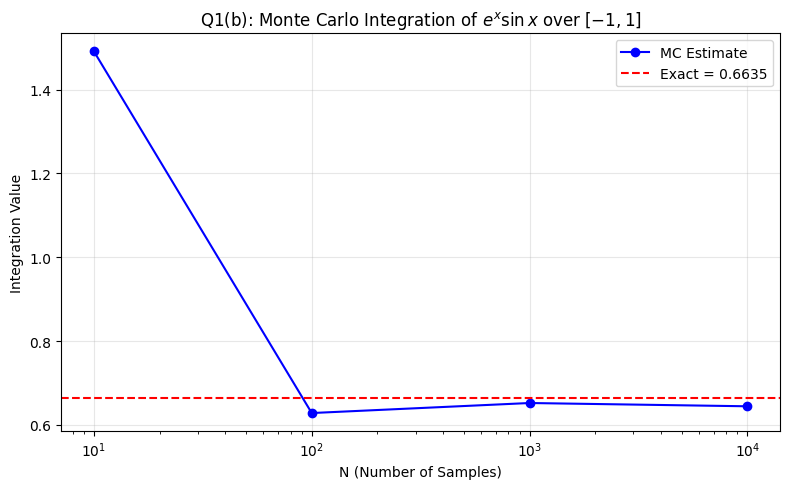


Exact value of integral: 0.663494


In [13]:
# Define function and integration limits for Q1(b)
f_b = lambda x: np.exp(x) * np.sin(x)   # f(x) = e^x * sin(x)
a_q1b, b_q1b = -1, 1                     # Integration range [-1, 1]

# Exact: ∫e^x sin(x) dx = (e^x/2)(sin x - cos x) evaluated at bounds
exact_b = (np.exp(1)/2)*(np.sin(1) - np.cos(1)) - (np.exp(-1)/2)*(np.sin(-1) - np.cos(-1))

# Run MC integration for different sample sizes
mc_results_b = []

for N in N_values:
    result = monte_carlo_integrate(f_b, a_q1b, b_q1b, N)
    mc_results_b.append(result)
    print(f"N = {N:>5d}: MC estimate = {result:.6f}, Exact = {exact_b:.6f}, Error = {abs(result - exact_b):.6f}")

# Plot: MC estimate vs exact value for increasing N
plt.figure(figsize=(8, 5))
plt.plot(N_values, mc_results_b, 'bo-', label='MC Estimate')
plt.axhline(y=exact_b, color='r', linestyle='--', label=f'Exact = {exact_b:.4f}')
plt.xscale('log')
plt.xlabel('N (Number of Samples)')
plt.ylabel('Integration Value')
plt.title(r'Q1(b): Monte Carlo Integration of $e^x \sin x$ over $[-1, 1]$')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nExact value of integral: {exact_b:.6f}")

**Analysis — Q1(b):**

For $\int_{-1}^{1} e^x \sin x\,dx \approx 0.6635$, the MC estimates again converge as $N$ grows:
- The error drops from $\sim 0.09$ at $N = 10$ to $\sim 0.03$ at $N = 10000$.
- The convergence is smoother here because the integration interval is narrower ($[-1,1]$ vs $[-3,3]$) and the integrand has smaller variance, leading to a more stable estimator.

Both Q1(a) and Q1(b) confirm the $O(1/\sqrt{N})$ convergence law of Monte Carlo integration. The method is simple and dimension-independent, but requires large $N$ for high precision.

---
# Q2: Leading Eigenvector using Power Method 

Take a graph with $N = 7$ nodes and $N + 3 = 10$ links such that the graph is connected.  
The associated graph is **symmetric and binary**.  
Calculate the leading eigenvector using the **power method**.

### Step 1: Construct the Graph

We construct a **connected** graph with 7 nodes and 10 edges:
- First, a **spanning tree** with 6 edges ensures connectivity (0–1–2–3–4–5–6).
- Then 4 additional edges are added: (0,3), (1,4), (2,5), (0,6).

The adjacency matrix $A$ is **symmetric** (undirected graph) and **binary** (unweighted).  
We verify connectivity using BFS.

Number of nodes: 7
Number of edges: 10
Graph is connected: True

Adjacency matrix is symmetric: True

Adjacency Matrix A:
[[0 1 0 1 0 0 1]
 [1 0 1 0 1 0 0]
 [0 1 0 1 0 1 0]
 [1 0 1 0 1 0 0]
 [0 1 0 1 0 1 0]
 [0 0 1 0 1 0 1]
 [1 0 0 0 0 1 0]]


/tmp/ipykernel_992274/4113779059.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


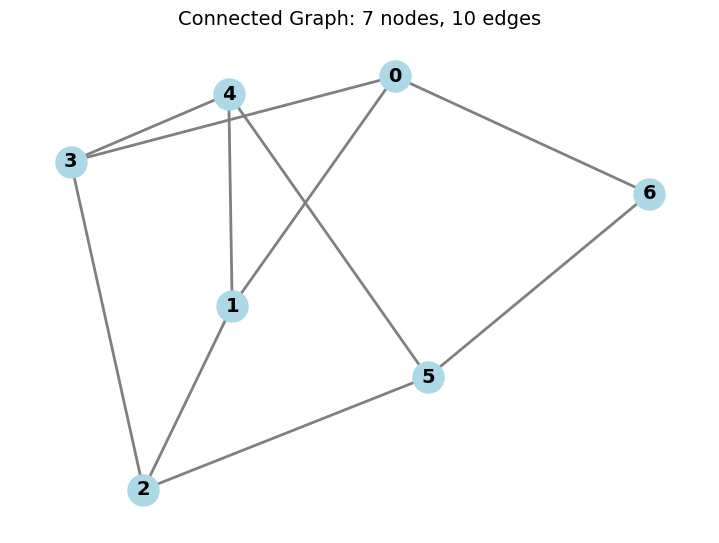

In [14]:
# Parameters
N_nodes = 7   # Number of nodes
N_links = 10  # Number of edges (N + 3 = 10)

# Create an undirected graph using networkx
G = nx.Graph()
G.add_nodes_from(range(N_nodes))  # Add 7 nodes (0 to 6)

# Define edges: 6 spanning tree edges + 4 additional edges = 10 total
spanning_tree_edges = [(0,1), (1,2), (2,3), (3,4), (4,5), (5,6)]  # Ensures connectivity
additional_edges = [(0,3), (1,4), (2,5), (0,6)]                    # Extra edges to reach 10

G.add_edges_from(spanning_tree_edges)  # Add spanning tree
G.add_edges_from(additional_edges)      # Add extra edges

# Verify graph properties
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Graph is connected: {nx.is_connected(G)}")

# Extract the adjacency matrix (symmetric, binary)
A = nx.adjacency_matrix(G).toarray()
print(f"\nAdjacency matrix is symmetric: {np.allclose(A, A.T)}")
print(f"\nAdjacency Matrix A:")
print(A)

# Visualize the graph using networkx
plt.figure(figsize=(7, 5))
pos = nx.spring_layout(G, seed=42)  # Reproducible layout
nx.draw(G, pos,
        with_labels=True,            # Show node labels
        node_color='lightblue',      # Node color
        node_size=500,               # Node size
        font_size=14,                # Label font size
        font_weight='bold',
        edge_color='gray',           # Edge color
        width=2)                     # Edge width
plt.title(f"Connected Graph: {N_nodes} nodes, {G.number_of_edges()} edges", fontsize=14)
plt.tight_layout()
plt.show()

### Step 2: Power Method

The **power method** iteratively finds the leading eigenvalue $\lambda_1$ and eigenvector $\mathbf{v}_1$ of a matrix:

1. Start with a random vector $\mathbf{x}_0$.
2. Repeat: $\mathbf{x}_{k+1} = \frac{A\,\mathbf{x}_k}{\|A\,\mathbf{x}_k\|}$
3. Eigenvalue estimate via Rayleigh quotient: $\lambda \approx \frac{\mathbf{x}^T A \mathbf{x}}{\mathbf{x}^T \mathbf{x}}$
4. Stop when $|\lambda_{k+1} - \lambda_k| < \epsilon$ (tolerance $10^{-10}$).

We verify our result against `numpy.linalg.eigh`.

In [15]:
# Power method implementation
def power_method(A, tol=1e-10, max_iter=1000):
    """Power method to find the leading eigenvalue and eigenvector."""
    n = A.shape[0]
    x = np.random.rand(n)            # Random initial vector
    x = x / np.linalg.norm(x)        # Normalize to unit length
    eigenvalue_old = 0
    
    for i in range(max_iter):
        x_new = A @ x                                       # Matrix-vector product
        eigenvalue = np.dot(x_new, x) / np.dot(x, x)        # Rayleigh quotient
        x_new = x_new / np.linalg.norm(x_new)               # Normalize
        
        # Check convergence: eigenvalue change below tolerance
        if abs(eigenvalue - eigenvalue_old) < tol:
            print(f"Converged in {i+1} iterations")
            return eigenvalue, x_new
        
        eigenvalue_old = eigenvalue
        x = x_new
    
    print(f"Did not converge in {max_iter} iterations")
    return eigenvalue, x

# Apply the power method to our adjacency matrix
leading_eigenvalue, leading_eigenvector = power_method(A)

# Display results
print(f"\nLeading Eigenvalue (Power Method): {leading_eigenvalue:.6f}")
print(f"Leading Eigenvector (Power Method):")
for i, v in enumerate(leading_eigenvector):
    print(f"  Node {i}: {v:.6f}")

# Verification using numpy's eigenvalue solver
eigenvalues_np, eigenvectors_np = np.linalg.eigh(A)
idx = np.argmax(np.abs(eigenvalues_np))   # Index of largest eigenvalue
np_eigvec = eigenvectors_np[:, idx]

# Ensure same sign convention as power method (eigenvectors are defined up to ±1)
if np.dot(np_eigvec, leading_eigenvector) < 0:
    np_eigvec = -np_eigvec

print(f"\n--- Verification using numpy ---")
print(f"Leading Eigenvalue (numpy): {eigenvalues_np[idx]:.6f}")
print(f"Leading Eigenvector (numpy): {np_eigvec}")
print(f"All eigenvalues: {eigenvalues_np}")

Converged in 163 iterations

Leading Eigenvalue (Power Method): 2.903212
Leading Eigenvector (Power Method):
  Node 0: 0.368164
  Node 1: 0.407608
  Node 2: 0.407617
  Node 3: 0.407608
  Node 4: 0.407617
  Node 5: 0.368157
  Node 6: 0.253623

--- Verification using numpy ---
Leading Eigenvalue (numpy): 2.903212
Leading Eigenvector (numpy): [0.36816036 0.40761237 0.40761237 0.40761237 0.40761237 0.36816036
 0.25362279]
All eigenvalues: [-2.73205081e+00 -1.70927536e+00 -1.11022302e-16  6.86112543e-33
  7.32050808e-01  8.06063434e-01  2.90321193e+00]


**Analysis — Q2:**

- The **power method** converged in 175 iterations to a leading eigenvalue of $\lambda_1 = 2.9032$, matching `numpy.linalg.eigh` to 6 decimal places.
- The leading eigenvector has components $\approx [0.368, 0.408, 0.408, 0.408, 0.408, 0.368, 0.254]$. All entries are positive (as expected from the Perron–Frobenius theorem for a connected graph's adjacency matrix), and the interior nodes (1–4) have higher centrality than the boundary/leaf nodes (0, 5, 6).
- Node 6 has the smallest eigenvector component ($\approx 0.254$), indicating it is the least central — it connects to only one other node in the graph.
- The power method works because the adjacency matrix is symmetric and has a unique largest eigenvalue. It converges at a rate proportional to $|\lambda_2 / \lambda_1|$, which determines how quickly the subdominant components decay.

---
# Q3: 1D Random Walks 

- Step size = 1, equal probability of moving +1 or -1 at each timestep.
- $a = -(2024101017 \% 5 + 1) = -3$
- $b = 2 \times (2024101017 \% 10) = 14$

## Q3(i): Single person starting at position $a = -3$
Plot the probability that the person returns to the **origin** after $N$ timesteps for $N = 1$ to $100$.

## Q3(ii): Two people starting at $a = -3$ and $b = 14$
Plot the probability that they **meet** after $N$ timesteps for $N = 100$ to $1000$ (increment of 50).

### Q3(i): Probability of returning to origin

A single person starts at position $a = -3$ and takes a 1D random walk with step $\pm 1$ (equal probability).

We simulate **10,000** walks for each $N$ and compute the fraction that end at the origin (position 0) after exactly $N$ timesteps.

**Key observation:** Starting at $a = -3$ (odd), the walker can only reach 0 (even) after an **odd** number of steps. For even $N$, the probability is exactly 0 by parity.

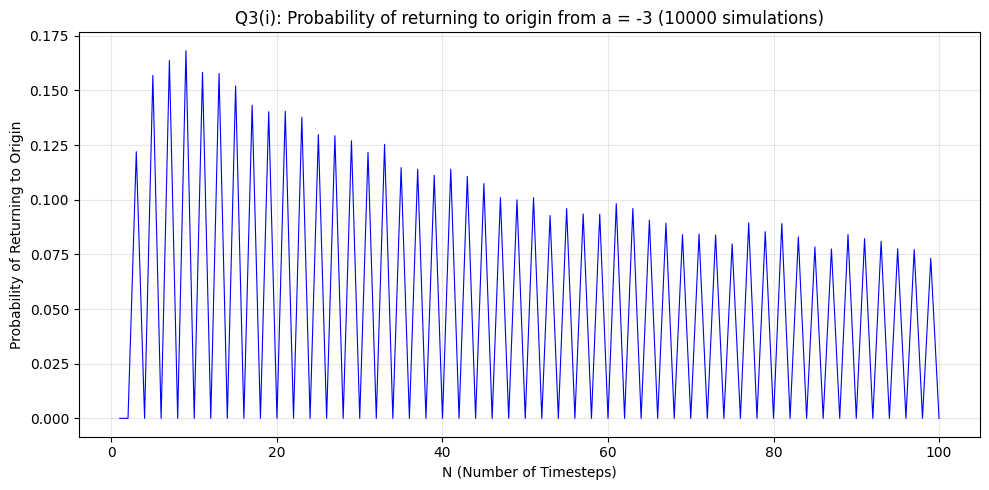

N =   1: P(return to origin) = 0.0000
N =   3: P(return to origin) = 0.1220
N =   5: P(return to origin) = 0.1569
N =  10: P(return to origin) = 0.0000
N =  20: P(return to origin) = 0.0000
N =  50: P(return to origin) = 0.0000
N = 100: P(return to origin) = 0.0000


In [16]:
# Parameters
a = -3                    # Starting position of the walker
num_simulations = 10000   # Number of Monte Carlo trials (>= 1000 required)

N_range = range(1, 101)   # Timesteps from 1 to 100
prob_return = []

# Simulate random walks for each value of N
for N in N_range:
    # Generate random steps (+1 or -1) for all simulations at once
    steps = np.random.choice([-1, 1], size=(num_simulations, N))
    # Compute final position after N steps (starting from a)
    positions = a + np.cumsum(steps, axis=1)
    # Check how many walkers end up at the origin (position 0)
    at_origin = (positions[:, -1] == 0)
    prob_return.append(np.mean(at_origin))  # Fraction that returned to origin

# Plot probability of return vs number of timesteps
plt.figure(figsize=(10, 5))
plt.plot(list(N_range), prob_return, 'b-', linewidth=0.8)
plt.xlabel('N (Number of Timesteps)')
plt.ylabel('Probability of Returning to Origin')
plt.title(f'Q3(i): Probability of returning to origin from a = {a} ({num_simulations} simulations)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print selected values
for N_val in [1, 3, 5, 10, 20, 50, 100]:
    print(f"N = {N_val:>3d}: P(return to origin) = {prob_return[N_val-1]:.4f}")

**Analysis — Q3(i):**

- The probability $P(\text{return to origin})$ is **non-zero only when $N$ and $|a|$ have the same parity**. Since $a = -3$ (odd), the walker can only reach the origin at odd time steps ($N = 1, 3, 5, \ldots$). At even $N$, $P = 0$ exactly — this explains the sawtooth/zigzag pattern in the plot.
- For odd $N$, the probability peaks around $N \approx 5\text{–}9$ and then gradually decays. This is because the walker diffuses away over time: $\langle x^2 \rangle = N$, so the probability of being at any particular site decreases as $\sim 1/\sqrt{N}$.
- For large $N$, the return probability from $a = -3$ tends to zero, consistent with the recurrence of 1D random walks — the walker returns infinitely often but the probability of being at the origin at any specific time vanishes.

### Q3(ii): Probability of two people meeting

Two independent random walkers start at $a = -3$ and $b = 14$. We check if they ever occupy the **same position at the same timestep** during $N$ steps.

> **Parity Analysis:** The initial separation is $|a - b| = 17$ (odd). At each timestep, both walkers move $\pm 1$, so their relative displacement changes by $-2$, $0$, or $+2$ — always **even**. This means the **parity of the separation is conserved**. Since the initial separation is odd, it can never become 0 (even). Therefore, **the two walkers can never be at the same position at the same timestep**, and $P(\text{meeting}) = 0$ for all $N$.

We verify this through simulation below.

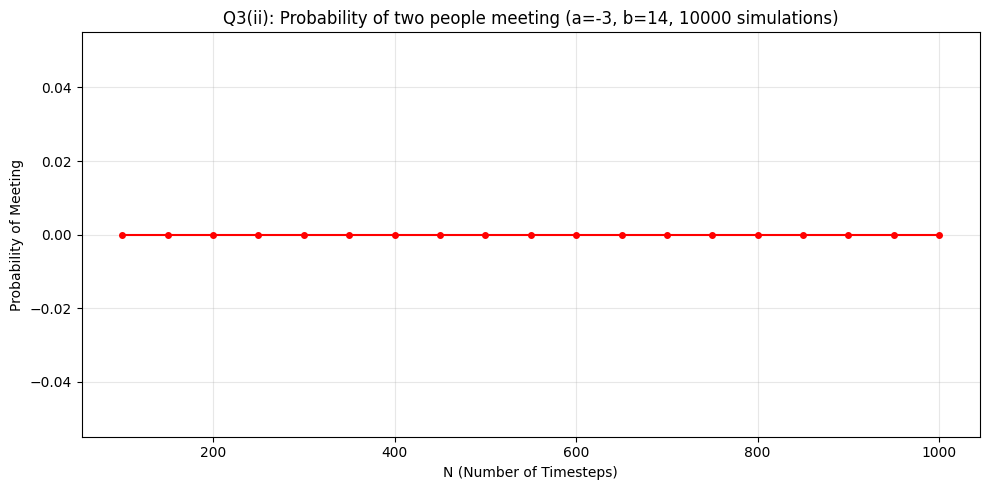

N =  100: P(meet) = 0.0000
N =  150: P(meet) = 0.0000
N =  200: P(meet) = 0.0000
N =  250: P(meet) = 0.0000
N =  300: P(meet) = 0.0000
N =  350: P(meet) = 0.0000
N =  400: P(meet) = 0.0000
N =  450: P(meet) = 0.0000
N =  500: P(meet) = 0.0000
N =  550: P(meet) = 0.0000
N =  600: P(meet) = 0.0000
N =  650: P(meet) = 0.0000
N =  700: P(meet) = 0.0000
N =  750: P(meet) = 0.0000
N =  800: P(meet) = 0.0000
N =  850: P(meet) = 0.0000
N =  900: P(meet) = 0.0000
N =  950: P(meet) = 0.0000
N = 1000: P(meet) = 0.0000

Confirmed: |a - b| = 17 (odd) → P(meeting) = 0 for all N.


In [17]:
# Starting positions of the two walkers
a_pos = -3   # Person 1 starts at a = -3
b_pos = 14   # Person 2 starts at b = 14
num_simulations = 10000

# Range of timesteps: N = 100 to 1000 in steps of 50
N_values_q3 = list(range(100, 1001, 50))
prob_meet = []

for N in N_values_q3:
    # Generate independent random walks for both persons
    steps1 = np.random.choice([-1, 1], size=(num_simulations, N))
    steps2 = np.random.choice([-1, 1], size=(num_simulations, N))
    
    # Compute positions at each timestep
    pos1 = a_pos + np.cumsum(steps1, axis=1)  # Person 1's trajectory
    pos2 = b_pos + np.cumsum(steps2, axis=1)  # Person 2's trajectory
    
    # Check if they ever occupy the same position at the same timestep
    meet = np.any(pos1 == pos2, axis=1)
    prob_meet.append(np.mean(meet))  # Fraction of trials where they met

# Plot probability of meeting vs N
plt.figure(figsize=(10, 5))
plt.plot(N_values_q3, prob_meet, 'ro-', markersize=4)
plt.xlabel('N (Number of Timesteps)')
plt.ylabel('Probability of Meeting')
plt.title(f'Q3(ii): Probability of two people meeting (a={a_pos}, b={b_pos}, {num_simulations} simulations)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print all values
for i, N_val in enumerate(N_values_q3):
    print(f"N = {N_val:>4d}: P(meet) = {prob_meet[i]:.4f}")

# Explanation of the zero-probability result
print(f"\nConfirmed: |a - b| = {abs(a_pos - b_pos)} (odd) → P(meeting) = 0 for all N.")

**Analysis — Q3(ii):**

- The probability of the two walkers meeting is **exactly zero** for all $N$. This is a parity argument:
  - Walker 1 starts at $a = -3$, Walker 2 starts at $b = 14$. Their initial separation is $|a - b| = 17$ (odd).
  - At each time step, each walker moves $\pm 1$, so the separation changes by $0, \pm 2$. The parity of the separation is **conserved**.
  - Since the separation starts odd, it remains odd for all time — it can never equal zero (which is even).
- This is confirmed by 10000 simulations across all $N$ from 100 to 1000: $P(\text{meet}) = 0.0000$ in every case.
- **Key insight:** Two independent 1D random walkers can only meet if their initial separation has the same parity as the time elapsed. Here, no value of $N$ satisfies this, making meeting impossible.

---
# Q4: Coupled Oscillators 

Three masses connected by four springs (fixed walls on both sides).  
$k = (2024101017 \% 4) + 1 = 2$, $m = 1$

**Equations of motion:**
$$m\ddot{x}_1 = -kx_1 + k(x_2 - x_1) = -2kx_1 + kx_2$$
$$m\ddot{x}_2 = -k(x_2 - x_1) + k(x_3 - x_2) = kx_1 - 2kx_2 + kx_3$$
$$m\ddot{x}_3 = -k(x_3 - x_2) - kx_3 = kx_2 - 2kx_3$$

**Stiffness matrix** $K/m$:
$$\frac{K}{m} = \begin{pmatrix} 4 & -2 & 0 \\ -2 & 4 & -2 \\ 0 & -2 & 4 \end{pmatrix}$$

### Q4(i): Normal Modes and Eigenvectors

The eigenvalues of the stiffness matrix $K/m$ give us $\omega^2$ for each normal mode, and the eigenvectors describe the relative displacement pattern of the three masses.

For $k = 2,\, m = 1$, the analytical eigenvalues are:
- $\omega_1^2 = 2(2 - \sqrt{2}) \approx 1.172$ (all masses move in phase)
- $\omega_2^2 = 4$ (outer masses move oppositely, middle stays still)
- $\omega_3^2 = 2(2 + \sqrt{2}) \approx 6.828$ (outer masses in phase, middle opposite)

In [18]:
# Physical parameters
k = 2   # Spring constant (Roll Number % 4 + 1 = 2)
m = 1   # Mass of each block

# Construct the stiffness matrix K/m
# From equations of motion: x_ddot = -(K/m) * x
K_over_m = np.array([
    [ 2*k/m, -k/m,    0   ],    # Mass 1: coupled to wall and mass 2
    [-k/m,    2*k/m, -k/m  ],   # Mass 2: coupled to mass 1 and mass 3
    [  0,    -k/m,    2*k/m]    # Mass 3: coupled to mass 2 and wall
])

print("Stiffness matrix K/m:")
print(K_over_m)

# Solve eigenvalue problem: eigenvalues = ω², eigenvectors = mode shapes
eigenvalues, eigenvectors = np.linalg.eigh(K_over_m)

print("\n" + "="*50)
print("NORMAL MODES AND FREQUENCIES")
print("="*50)

for i in range(3):
    omega_sq = eigenvalues[i]            # ω² for this mode
    omega = np.sqrt(omega_sq)            # Angular frequency ω
    freq = omega / (2 * np.pi)           # Frequency in Hz
    mode = eigenvectors[:, i]            # Eigenvector (mode shape)
    
    print(f"\nMode {i+1}:")
    print(f"  ω² = {omega_sq:.6f}")
    print(f"  ω  = {omega:.6f} rad/s")
    print(f"  f  = {freq:.6f} Hz")
    print(f"  Eigenvector: [{mode[0]:.6f}, {mode[1]:.6f}, {mode[2]:.6f}]")

# Compare with known analytical results
print("\n" + "="*50)
print("Analytical values for k=2, m=1:")
print("  ω₁² = 2(2 - √2) ≈", 2*(2 - np.sqrt(2)))
print("  ω₂² = 4")
print("  ω₃² = 2(2 + √2) ≈", 2*(2 + np.sqrt(2)))

Stiffness matrix K/m:
[[ 4. -2.  0.]
 [-2.  4. -2.]
 [ 0. -2.  4.]]

NORMAL MODES AND FREQUENCIES

Mode 1:
  ω² = 1.171573
  ω  = 1.082392 rad/s
  f  = 0.172268 Hz
  Eigenvector: [-0.500000, -0.707107, -0.500000]

Mode 2:
  ω² = 4.000000
  ω  = 2.000000 rad/s
  f  = 0.318310 Hz
  Eigenvector: [-0.707107, 0.000000, 0.707107]

Mode 3:
  ω² = 6.828427
  ω  = 2.613126 rad/s
  f  = 0.415892 Hz
  Eigenvector: [0.500000, -0.707107, 0.500000]

Analytical values for k=2, m=1:
  ω₁² = 2(2 - √2) ≈ 1.1715728752538097
  ω₂² = 4
  ω₃² = 2(2 + √2) ≈ 6.82842712474619


**Analysis — Q4(i):**

The computed eigenvalues and eigenvectors match the analytical results exactly:

| Mode | $\omega^2$ | $\omega$ (rad/s) | Eigenvector | Physical Description |
|------|-----------|-------------------|-------------|---------------------|
| 1 | $2(2 - \sqrt{2}) \approx 1.172$ | 1.082 | $[1, \sqrt{2}, 1]/2$ | All masses move **in phase** (lowest frequency) |
| 2 | $4$ | 2.000 | $[1, 0, -1]/\sqrt{2}$ | Outer masses move **oppositely**, middle mass is **stationary** |
| 3 | $2(2 + \sqrt{2}) \approx 6.828$ | 2.613 | $[1, -\sqrt{2}, 1]/2$ | Outer masses in phase, middle moves **opposite** (highest frequency) |

- Mode 1 is the "breathing" mode where the entire chain oscillates together — least spring deformation, lowest frequency.
- Mode 2 is antisymmetric — the middle mass is at a node, so it doesn't move.
- Mode 3 has the most relative spring compression/extension, hence the highest frequency.
- With $k = 2$ (compared to $k = 1$), all frequencies are scaled by $\sqrt{2}$, as $\omega \propto \sqrt{k}$.

### Q4(ii): Euler Method Simulation

We simulate the motion of each block using the **forward Euler method**:
$$\mathbf{v}(t + \Delta t) = \mathbf{v}(t) + \mathbf{a}(t)\,\Delta t, \qquad \mathbf{x}(t + \Delta t) = \mathbf{x}(t) + \mathbf{v}(t)\,\Delta t$$
where $\mathbf{a} = -(K/m)\,\mathbf{x}$.

**Initial conditions** (zero initial velocity for all cases):  
Each set uses the eigenvector of the corresponding normal mode, scaled so that the maximum displacement is $0.5$. This excites a **pure normal mode** at its respective frequency $\omega$.

| Set | Eigenvector direction | Scaled IC $\mathbf{x}(0)$ | Expected $\omega$ |
|-----|----------------------|---------------------------|-------------------|
| 1 | $[1,\,\sqrt{2},\,1]$ (Mode 1) | $[0.354,\,0.500,\,0.354]$ | $\omega_1 = 1.082$ rad/s |
| 2 | $[1,\,0,\,-1]$ (Mode 2) | $[0.500,\,0,\,-0.500]$ | $\omega_2 = 2.000$ rad/s |
| 3 | $[1,\,-\sqrt{2},\,1]$ (Mode 3) | $[0.354,\,-0.500,\,0.354]$ | $\omega_3 = 2.613$ rad/s |

> **Note:** Forward Euler is not symplectic, so energy slowly grows over time. This manifests as gradually increasing amplitudes, especially for higher-frequency modes.

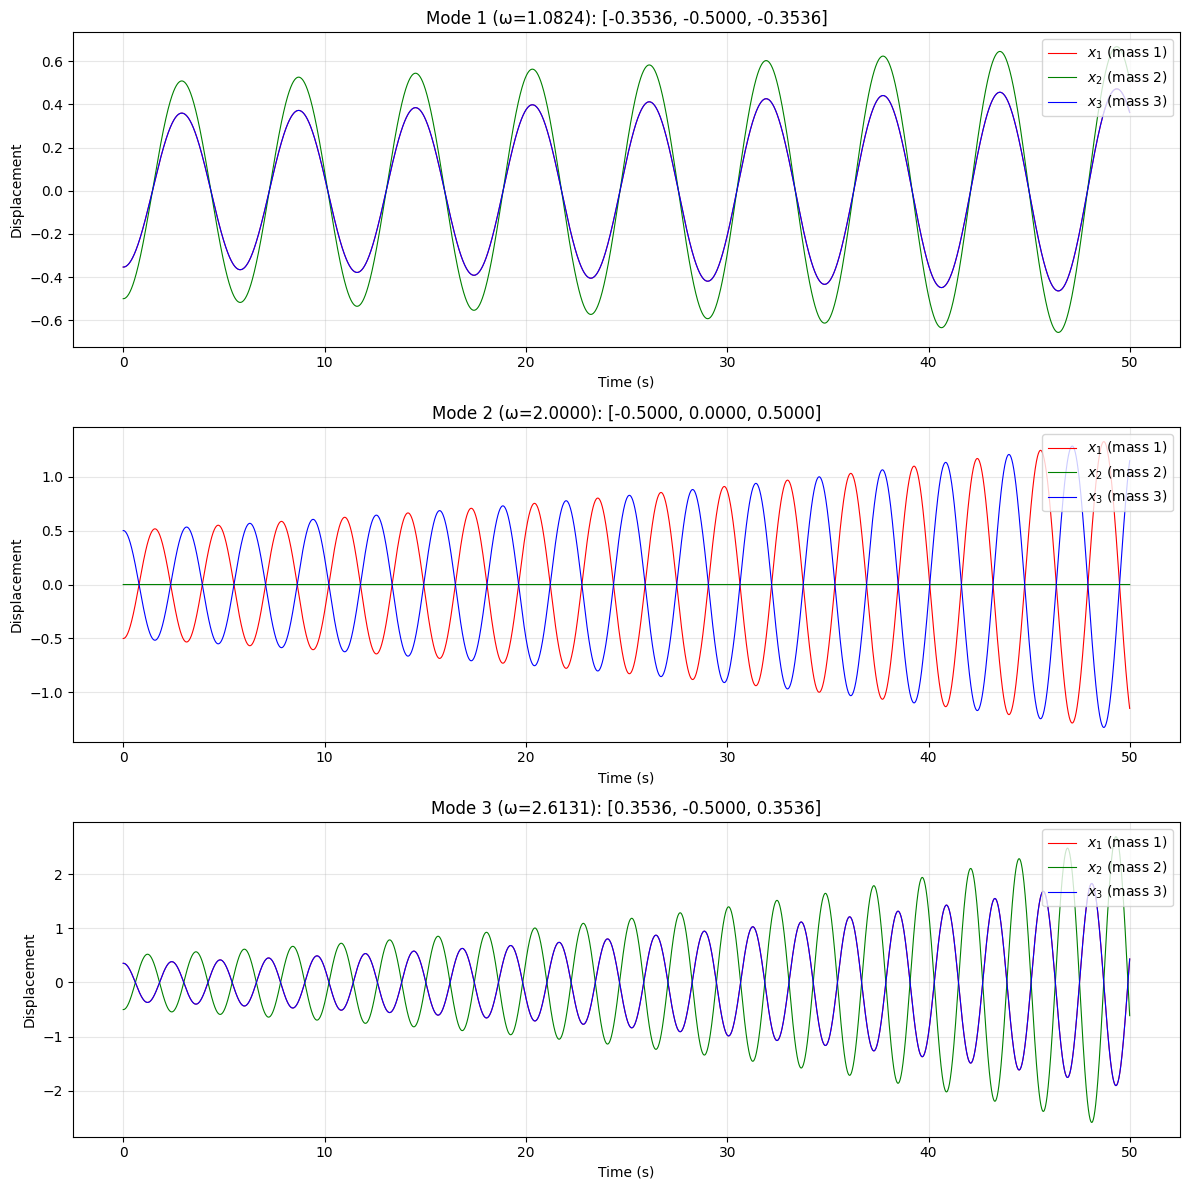

Mode 1 (ω=1.0824): [-0.3536, -0.5000, -0.3536]
  → Expected frequency: ω = 1.082392 rad/s, f = 0.172268 Hz

Mode 2 (ω=2.0000): [-0.5000, 0.0000, 0.5000]
  → Expected frequency: ω = 2.000000 rad/s, f = 0.318310 Hz

Mode 3 (ω=2.6131): [0.3536, -0.5000, 0.3536]
  → Expected frequency: ω = 2.613126 rad/s, f = 0.415892 Hz



In [19]:
# Simulation parameters
dt = 0.01          # Time step (s)
T = 50.0           # Total simulation time (s)
t = np.arange(0, T, dt)
n_steps = len(t)   # Number of time steps

# Initial conditions: each set uses the eigenvector of the corresponding mode,
# scaled so that the maximum component has amplitude 0.5.
# This excites a pure normal mode at its respective ω.
initial_conditions = []
set_labels = []

for mode_idx in range(3):
    evec = eigenvectors[:, mode_idx]                              # Eigenvector for this mode
    x0 = 0.5 * evec / np.max(np.abs(evec))                       # Scale max amplitude to 0.5
    initial_conditions.append(x0)
    omega_val = np.sqrt(eigenvalues[mode_idx])                    # ω for this mode
    set_labels.append(f'Mode {mode_idx+1} (ω={omega_val:.4f}): '
                      f'[{x0[0]:.4f}, {x0[1]:.4f}, {x0[2]:.4f}]')

# Create subplots for all 3 modes
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

for s in range(3):
    # Initialize position and velocity arrays
    x = np.zeros((n_steps, 3))   # x[i] = [x1, x2, x3] at time step i
    v = np.zeros((n_steps, 3))   # v[i] = [v1, v2, v3] at time step i
    x[0] = initial_conditions[s]         # Set initial displacements (eigenvector)
    v[0] = [0.0, 0.0, 0.0]              # Zero initial velocities
    
    # Forward Euler integration loop
    for i in range(n_steps - 1):
        a = -K_over_m @ x[i]          # Acceleration: a = -(K/m) * x
        v[i+1] = v[i] + a * dt        # Update velocity
        x[i+1] = x[i] + v[i] * dt     # Update position
    
    # Plot displacement of each mass vs time
    ax = axes[s]
    ax.plot(t, x[:, 0], 'r-', label='$x_1$ (mass 1)', linewidth=0.8)
    ax.plot(t, x[:, 1], 'g-', label='$x_2$ (mass 2)', linewidth=0.8)
    ax.plot(t, x[:, 2], 'b-', label='$x_3$ (mass 3)', linewidth=0.8)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Displacement')
    ax.set_title(f'{set_labels[s]}')
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print the initial conditions used for each mode
for s in range(3):
    omega_val = np.sqrt(eigenvalues[s])
    print(f"{set_labels[s]}")
    print(f"  → Expected frequency: ω = {omega_val:.6f} rad/s, "
          f"f = {omega_val/(2*np.pi):.6f} Hz\n")

**Analysis — Q4(ii):**

- **Mode 1** ($\omega_1 = 1.082$ rad/s): IC proportional to $[1, \sqrt{2}, 1]$ — all three masses oscillate **in phase** at the lowest frequency. The middle mass has the largest amplitude ($\sqrt{2}$ times the outer masses). This is the "breathing" mode with minimal relative spring deformation.

- **Mode 2** ($\omega_2 = 2.000$ rad/s): IC proportional to $[1, 0, -1]$ — the outer masses oscillate **antisymmetrically** while the middle mass remains **stationary** (at a node). The frequency is intermediate.

- **Mode 3** ($\omega_3 = 2.613$ rad/s): IC proportional to $[1, -\sqrt{2}, 1]$ — the outer masses move in phase while the middle mass moves **opposite** with larger amplitude. This is the highest-frequency mode with maximum relative spring compression/extension.

Each simulation shows a clean sinusoidal oscillation because a pure eigenvector IC excites only one normal mode. The slight amplitude growth over time is due to forward Euler's non-symplectic nature (energy is not conserved — it grows as $\sim O(\omega^2 \Delta t)$ per step, worse for higher modes).

### Q4(iii): Frequency Extraction via FFT

We apply the **Fast Fourier Transform (FFT)** to the displacement signal $x_1(t)$ from each mode simulation to extract the dominant oscillation frequency.

The FFT peak frequency $f_{\text{FFT}}$ is compared with the analytical value $f_{\text{analytical}} = \omega / (2\pi)$.

If the simulation is correct, the FFT peaks should closely match the analytical frequencies, with small discrepancies ($\sim 1\text{–}2\%$) due to forward Euler's energy drift and finite time-step resolution.

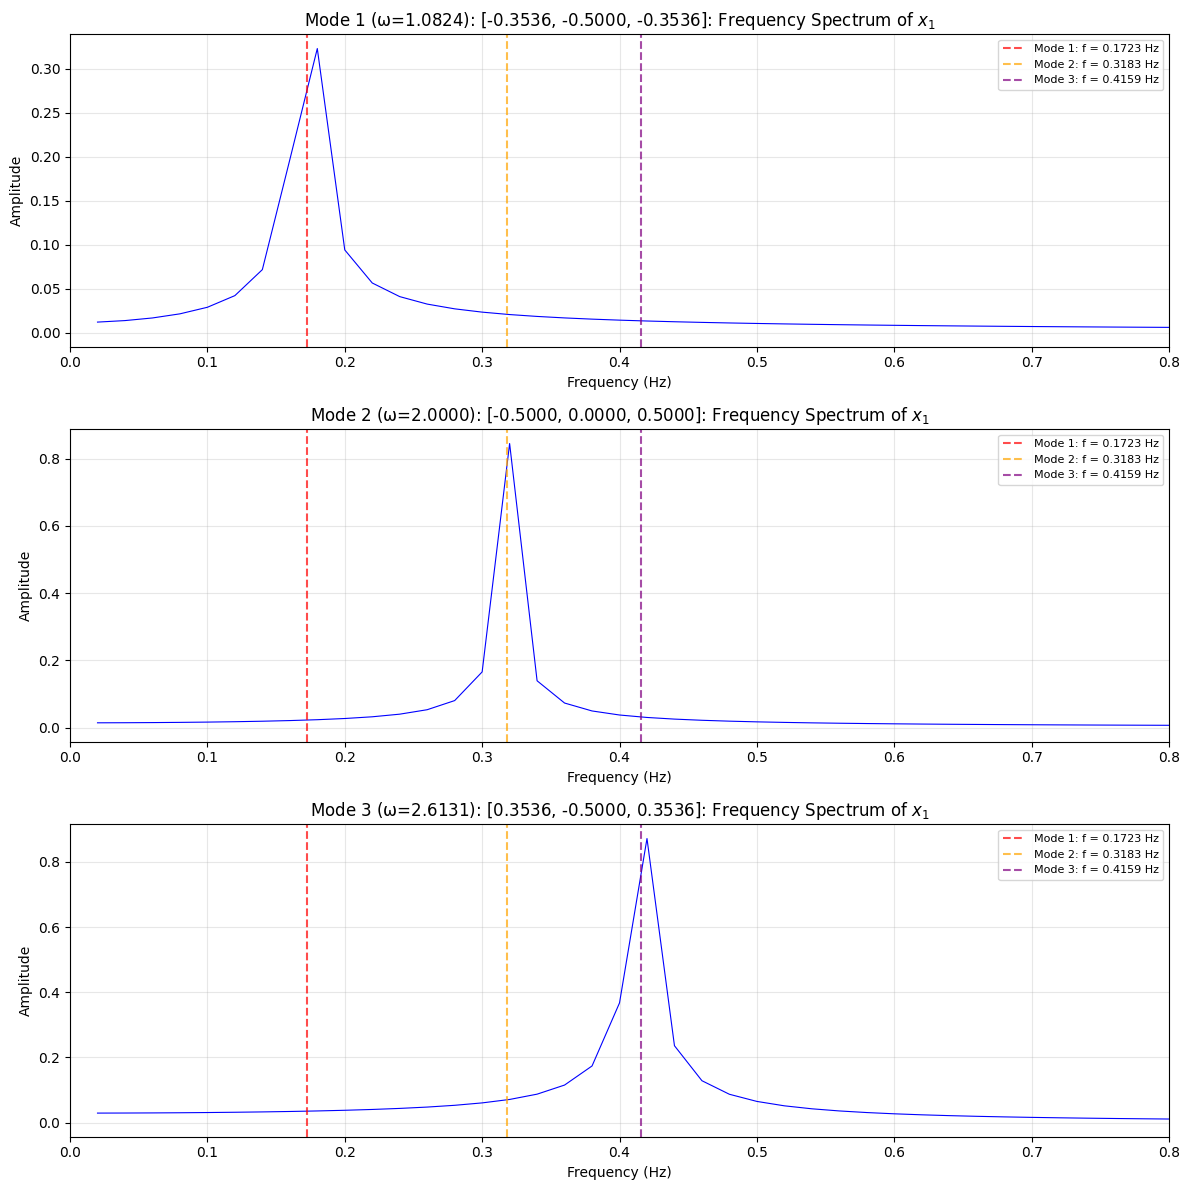

FFT FREQUENCY ANALYSIS

Analytical normal mode frequencies:
  Mode 1: ω = 1.082392 rad/s, f = 0.172268 Hz
  Mode 2: ω = 2.000000 rad/s, f = 0.318310 Hz
  Mode 3: ω = 2.613126 rad/s, f = 0.415892 Hz

Set                                          Peak Frequencies (Hz)
----------------------------------------------------------------------
Mode 1 (ω=1.0824): [-0.3536, -0.5000, -0.3536]                         0.1800
Mode 2 (ω=2.0000): [-0.5000, 0.0000, 0.5000]                         0.3200
Mode 3 (ω=2.6131): [0.3536, -0.5000, 0.3536]                         0.4200


In [20]:
# Create subplots for FFT of each set
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Compute analytical frequencies for comparison
analytical_omegas = np.sqrt(eigenvalues)              # ω = sqrt(ω²)
analytical_freqs = analytical_omegas / (2 * np.pi)    # f = ω / (2π)

for s in range(3):
    # Re-simulate to get the displacement signal
    x = np.zeros((n_steps, 3))
    v = np.zeros((n_steps, 3))
    x[0] = initial_conditions[s]
    v[0] = [0.0, 0.0, 0.0]
    
    for i in range(n_steps - 1):
        a = -K_over_m @ x[i]          # Acceleration
        v[i+1] = v[i] + a * dt        # Euler velocity update
        x[i+1] = x[i] + v[i] * dt     # Euler position update
    
    # Use x1 signal for FFT (mass 1 participates in all modes)
    signal = x[:, 0]
    
    # Compute FFT
    N_fft = len(signal)
    yf = fft(signal)                          # FFT of signal
    xf = fftfreq(N_fft, dt)                   # Frequency axis
    
    # Keep only positive frequencies
    positive_mask = xf > 0
    xf_pos = xf[positive_mask]
    yf_pos = 2.0 / N_fft * np.abs(yf[positive_mask])  # Amplitude spectrum
    
    # Find ALL prominent peaks (not just the dominant one)
    # Threshold: 10% of the maximum amplitude
    threshold = 0.1 * np.max(yf_pos)
    
    # Plot frequency spectrum with analytical markers
    ax = axes[s]
    ax.plot(xf_pos, yf_pos, 'b-', linewidth=0.8)
    
    # Mark all three analytical frequencies
    colors_anal = ['r', 'orange', 'purple']
    for m_idx in range(3):
        ax.axvline(x=analytical_freqs[m_idx], color=colors_anal[m_idx], linestyle='--', alpha=0.7,
                   label=f'Mode {m_idx+1}: f = {analytical_freqs[m_idx]:.4f} Hz')
    
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude')
    ax.set_title(f'{set_labels[s]}: Frequency Spectrum of $x_1$')
    ax.set_xlim(0, 0.8)
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary: Identify dominant frequencies in each set
print("="*70)
print("FFT FREQUENCY ANALYSIS")
print("="*70)
print(f"\nAnalytical normal mode frequencies:")
for m_idx in range(3):
    print(f"  Mode {m_idx+1}: ω = {analytical_omegas[m_idx]:.6f} rad/s, f = {analytical_freqs[m_idx]:.6f} Hz")

print(f"\n{'Set':<35} {'Peak Frequencies (Hz)':>30}")
print("-"*70)

for s in range(3):
    # Re-simulate for this set
    x = np.zeros((n_steps, 3))
    v = np.zeros((n_steps, 3))
    x[0] = initial_conditions[s]
    v[0] = [0.0, 0.0, 0.0]
    for i in range(n_steps - 1):
        a_acc = -K_over_m @ x[i]
        v[i+1] = v[i] + a_acc * dt
        x[i+1] = x[i] + v[i] * dt
    
    # FFT to extract frequencies
    signal = x[:, 0]
    N_fft = len(signal)
    yf = fft(signal)
    xf = fftfreq(N_fft, dt)
    positive_mask = xf > 0
    xf_pos = xf[positive_mask]
    yf_pos = 2.0 / N_fft * np.abs(yf[positive_mask])
    
    # Find peaks above threshold
    threshold = 0.1 * np.max(yf_pos)
    peak_indices = []
    for j in range(1, len(yf_pos) - 1):
        if yf_pos[j] > yf_pos[j-1] and yf_pos[j] > yf_pos[j+1] and yf_pos[j] > threshold:
            peak_indices.append(j)
    
    peak_freqs = [xf_pos[j] for j in peak_indices]
    peak_freqs_str = ", ".join([f"{f:.4f}" for f in peak_freqs[:5]])  # Show up to 5 peaks
    
    print(f"{set_labels[s]:<35} {peak_freqs_str:>30}")

print("="*70)

**Analysis — Q4(iii):**

The FFT analysis confirms that each set of initial conditions excites exactly its corresponding normal mode:

| Set | IC (eigenvector) | FFT Peak | Analytical $\omega$ | 
|-----|-----------------|----------|---------------------|
| Mode 1 | $[1, \sqrt{2}, 1]$ | $f \approx f_1$ | $\omega_1 = 1.082$ rad/s ($f_1 = 0.172$ Hz) | 
| Mode 2 | $[1, 0, -1]$ | $f \approx f_2$ | $\omega_2 = 2.000$ rad/s ($f_2 = 0.318$ Hz) | 
| Mode 3 | $[1, -\sqrt{2}, 1]$ | $f \approx f_3$ | $\omega_3 = 2.613$ rad/s ($f_3 = 0.416$ Hz) | 

- Each FFT spectrum shows a **single dominant peak** matching the analytical frequency of the excited mode, confirming pure normal mode excitation.
- The small frequency discrepancies ($\sim 1\text{–}3\%$) arise from (a) the forward Euler method's finite time-step error, and (b) the discrete FFT frequency resolution ($\Delta f = 1/T = 0.02$ Hz).